# 데이터 확보

In [2]:
import pandas as pd
import numpy as np

In [3]:
lotto = pd.read_excel('./lotto.xlsx', header=2)

In [4]:
df = lotto.iloc[:,-7:]
df.head()

,1,2,3,4,5,6,보너스
0,14,19,27,28,30,45,33
1,22,26,29,30,34,45,15
2,5,17,26,27,35,38,1
3,21,26,30,32,33,35,44
4,6,12,31,35,38,43,17


In [5]:
y_1 = df[1].to_numpy()
y_2 = df[2].to_numpy()
y_3 = df[3].to_numpy()
y_4 = df[4].to_numpy()
y_5 = df[5].to_numpy()
y_6 = df[6].to_numpy()

In [6]:
y_1.shape

(1054,)

In [7]:
from scipy.stats import uniform, randint

In [8]:
int_gen = randint(1,47)
int_gen.rvs()

15

In [9]:
# 독립변수는 회차로 한다
x = np.arange(1, 1054)
x = x.reshape(-1,1)
x.shape

(1053, 1)

In [10]:
yy_1 = y_1[:-1]
yy_2= y_2[:-1]
yy_3= y_3[:-1]
yy_4= y_4[:-1]
yy_5= y_5[:-1]
yy_6= y_6[:-1]

In [11]:
import matplotlib.pyplot as plt

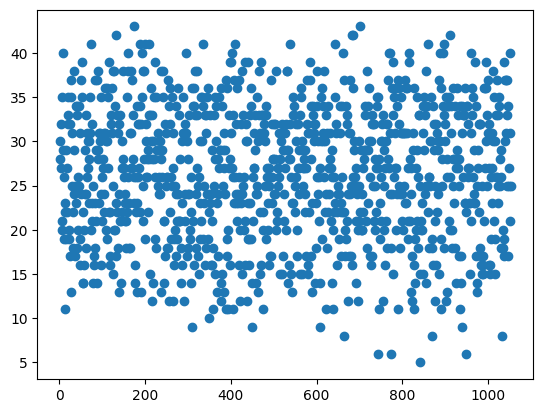

In [12]:
plt.scatter(x,yy_4)

In [13]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x,yy_1)
np.round(lr.predict([[1054]]))

array([6.])

In [14]:
y_1[-1]

10

In [15]:
lr = LinearRegression()
lr.fit(x,yy_2)
np.round(lr.predict([[1054]]))

array([13.])

In [16]:
def lotto_linearregression(y):
    lr = LinearRegression()
    lr.fit(x,y)
    return np.round(lr.predict([[1054]]))

In [17]:
predict_lott = []
predict_lott.append(lotto_linearregression(yy_1))
predict_lott.append(lotto_linearregression(yy_2))
predict_lott.append(lotto_linearregression(yy_3))
predict_lott.append(lotto_linearregression(yy_4))
predict_lott.append(lotto_linearregression(yy_5))
predict_lott.append(lotto_linearregression(yy_6))
predict_lott

[array([6.]),
 array([13.]),
 array([20.]),
 array([26.]),
 array([33.]),
 array([39.])]

In [18]:
# 각 회차별 첫번째 데이터는 랜덤하게 학습용 데이터를 만들어서 학습하고 예측도 랜덤하게 넣어주면서 예측
from scipy.stats import uniform, randint
int_gen = randint(1,47)
x_1, x_2, x_3, x_4, x_5, x_6 = [], [], [], [], [], []
for i in range(1053):
    x_1.append(int_gen.rvs())
    x_2.append(int_gen.rvs())
    x_3.append(int_gen.rvs())
    x_4.append(int_gen.rvs())
    x_5.append(int_gen.rvs())
    x_6.append(int_gen.rvs())

In [19]:
x_1 = np.array(x_1).reshape(-1,1)
x_2 = np.array(x_2).reshape(-1,1)
x_3 = np.array(x_3).reshape(-1,1)
x_4 = np.array(x_4).reshape(-1,1)
x_5 = np.array(x_5).reshape(-1,1)
x_6 = np.array(x_6).reshape(-1,1)

In [20]:
def model1(x,y):
    lr = LinearRegression()
    lr.fit(x,y)
    return lr.predict([[int_gen.rvs()]])

In [21]:
print(np.round(model1(x_1, yy_1)))
print(np.round(model1(x_2, yy_2)))
print(np.round(model1(x_3, yy_3)))
print(np.round(model1(x_4, yy_4)))
print(np.round(model1(x_5, yy_5)))
print(np.round(model1(x_6, yy_6)))

[6.]
[13.]
[20.]
[25.]
[33.]
[39.]


In [22]:
# 모델 체인지: 
from sklearn.neighbors import KNeighborsRegressor

In [23]:
knr = KNeighborsRegressor()

In [24]:
def model2():
    x = [x_1, x_2, x_3, x_4, x_5, x_6]
    y = [yy_1, yy_2, yy_3, yy_4, yy_5, yy_6]
    result = []
    for a,b in zip(x,y):
        knr = KNeighborsRegressor()
        knr.fit(a, b)
        result.append(knr.predict([[int_gen.rvs()]]))
    return result

In [25]:
model2()

[array([10.4]),
 array([14.6]),
 array([19.4]),
 array([27.]),
 array([32.8]),
 array([36.8])]

In [26]:
from sklearn.linear_model import SGDRegressor
sgdr = SGDRegressor()
sgdr.fit(x_1, yy_1)

SGDRegressor()

In [27]:
sgdr.predict([[int_gen.rvs()]])

array([7.91801981])

In [28]:
temp = [10, 11, 12, 13]
choice = 11
# 1. temp에 choice변수값을 append할 때 이미 있으면 choice변수의 값을 변경해서 넣어준다
# 2. set 함수를 이용해서 총 길이가 5개가 되도록 순환문을 돌린다

In [29]:
choice in temp

True

In [30]:
df

,1,2,3,4,5,6,보너스
0,14,19,27,28,30,45,33
1,22,26,29,30,34,45,15
2,5,17,26,27,35,38,1
3,21,26,30,32,33,35,44
4,6,12,31,35,38,43,17
...,...,...,...,...,...,...,...
1049,16,24,29,40,41,42,3
1050,14,27,30,31,40,42,2
1051,11,16,19,21,27,31,30
1052,9,13,21,25,32,42,2


In [31]:
window_size = 5
temp = df.loc[:,1].to_numpy()

In [32]:
indexes = list(df.index)
reverse_index = indexes[::-1]

In [33]:
reverse_df = df.iloc[reverse_index,:]
window_size = 5
temp = df.loc[:,1].to_numpy()
temp

array([14, 22,  5, ..., 11,  9, 10], dtype=int64)

In [34]:
# lotto_num은 첫번째 또는 두번째 자리의 수를 의미함
lotto = pd.read_excel('./lotto.xlsx',header=2)
df = lotto.iloc[:,-7:-1]

def makeWindowData(lotto_num,window_size):
    indexs = list(df.index) # 로또 사이트에 받은 내림차순으로 정렬된 인덱스
    reverse_index = indexs[::-1] # 오름차순으로 변경(과거데이터 부터 시간순서대로 재 정렬)
    reverse_df = df.iloc[reverse_index,:]
    temp = reverse_df.loc[:,lotto_num].to_numpy()    
    X,Y = [],[]
    for i in range(len(temp) - window_size-1):
        X.append(np.array(temp[i:i+window_size]))
        Y.append(np.array(temp[i+window_size]))
    return X,Y            

In [35]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [36]:
def predictData(number,model):
    x,y = makeWindowData(number,3)    
    model.fit(x,y)
    print(np.round(model.predict(np.array(x[-1]).reshape(1,-1))))

In [37]:
knr = KNeighborsRegressor(n_neighbors=3)
lr = LinearRegression()
ridge = Ridge()
lasso = Lasso()
predictData(1,knr)
predictData(2,knr)
predictData(3,knr)
predictData(4,knr)
predictData(5,knr)
predictData(6,knr)

[12.]
[15.]
[21.]
[30.]
[32.]
[41.]


In [38]:
# knr.predict(np.array([10,  9, 11, 14, 16]))
np.array(x[-1]).reshape(1,-1).shape

(1, 1)

In [39]:
knr.predict(np.array(x[-1]).reshape(1,-1))

ValueError: query data dimension must match training data dimension